In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def f(x):
    return 3*x**2 - 4*x +5

In [18]:
f(3.0)

20.0

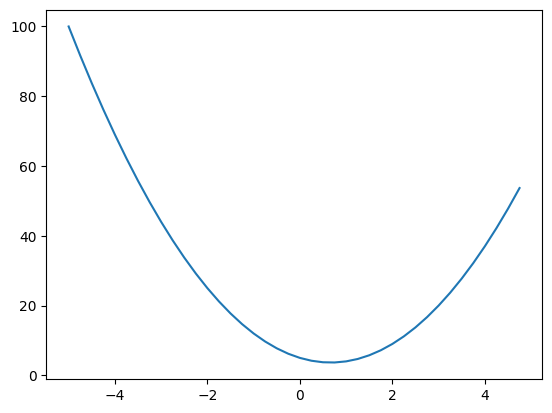

In [19]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [28]:
h = 1
x = np.arange(-5, 5, 0.25)
f(x+h)

array([69.    , 62.1875, 55.75  , 49.6875, 44.    , 38.6875, 33.75  ,
       29.1875, 25.    , 21.1875, 17.75  , 14.6875, 12.    ,  9.6875,
        7.75  ,  6.1875,  5.    ,  4.1875,  3.75  ,  3.6875,  4.    ,
        4.6875,  5.75  ,  7.1875,  9.    , 11.1875, 13.75  , 16.6875,
       20.    , 23.6875, 27.75  , 32.1875, 37.    , 42.1875, 47.75  ,
       53.6875, 60.    , 66.6875, 73.75  , 81.1875])

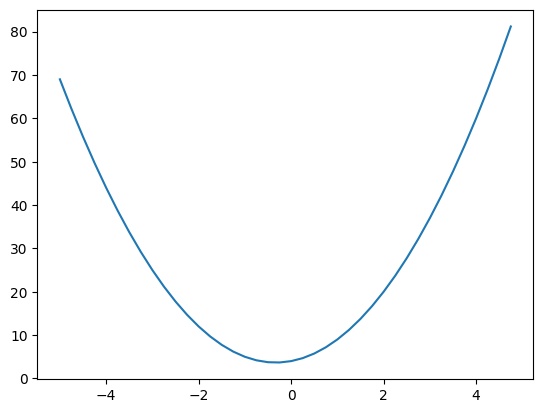

In [29]:
plt.plot(xs, f(x+h))

In [33]:
h = 0.00000001
x = 2/3
(f(x+h) - f(x))/h

0.0

In [10]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, _children=(self, other), _op='+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, _children=(self, other), _op='*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = d*f
L

Value(data=-8.0)

In [13]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data, ), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label=n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

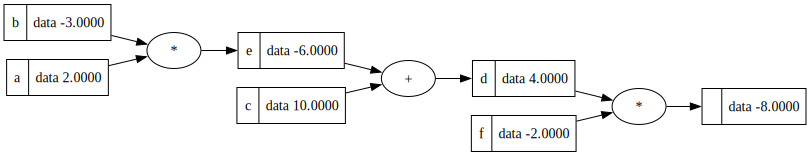

In [14]:
draw_dot(L)